<a href="https://github.com/Artem418k">Дерикон Артем</a>, 2024

### <h1 align="center">Лабораторна робота №3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1.</li>

</ol>

In [4]:
import numpy as np

# Функція для передбачення значень поліноміальної моделі
def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y
x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x)) # обчислення значення функції

# Тренувальні дані x_train та y_train з вашого варіанту
x_train_5 = np.array([[42, 6], [39, 18], [25, 16], [27, 13], [24, 33], [8, 44], [30, 17], [7, 48], [25, 17]])
y_train_5 = np.array([1, 1, -1, -1, -1, -1, 1, -1, -1])

N = len(x_train_5)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train_5[:, 0], y_train_5, 10)
print(z_train)

[ 1.27836793e-12 -9.67846468e-11 -5.71770039e-10  1.28746577e-07
  2.92836032e-06 -1.76745781e-04 -5.71411084e-03  3.85314724e-01
 -7.04379704e+00  5.24724879e+01 -1.39077871e+02]


C:\Users\vanaa\AppData\Local\Temp\ipykernel_19228\602815220.py:26: RankWarning: Polyfit may be poorly conditioned
  z_train = np.polyfit(x_train_5[:, 0], y_train_5, 10)


<ol>
   <b> 2.Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі.
</ol> -1 -1 -1 -1  1 -1 -1]

[-5.18938112 -4.45488016 -0.26137442  3.18293679  4.20016464  4.23356766
 -3.88430397 -4.46661249  2.81775601  1.99866487 -2.18777359 -3.35348766
 -4.95274109]


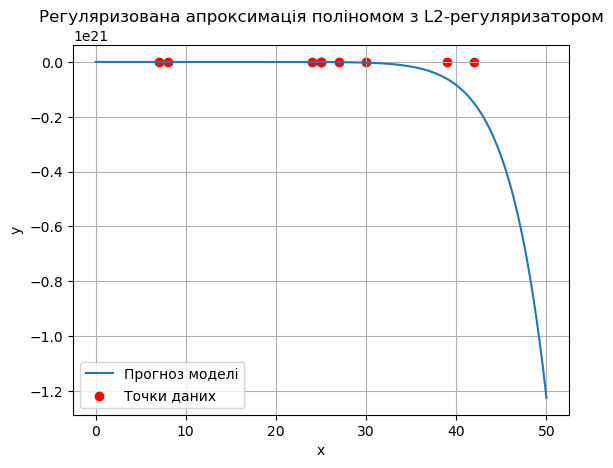

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_5 = np.array([[42, 6], [39, 18], [25, 16], [27, 13], [24, 33], [8, 44], [30, 17], [7, 48], [25, 17]])
y_train_5 = np.array([1, 1, -1, -1, -1, -1, 1, -1, -1])

# Параметри моделі
N = 13  # Степінь полінома (N-1)
L = 20  # Параметр регуляризації

# Створення матриці X для вихідних даних
X_train_5 = np.array([[a ** n for n in range(N)] for a in x_train_5[:, 0]])

# Створення матриці Y для вихідних даних
Y_train_5 = y_train_5

# Обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train_5.T @ X_train_5 + L * np.eye(N))
w = Y_train_5 @ X_train_5 @ A
print(w)

# Побудова прогнозів
x_range = np.linspace(0, 50, 1000)
X_range = np.array([[a ** n for n in range(N)] for a in x_range])
y_pred = X_range @ w

# Відображення графіків
plt.plot(x_range, y_pred, label='Прогноз моделі')
plt.scatter(x_train_5[:, 0], y_train_5, c='r', label='Точки даних')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Регуляризована апроксимація поліномом з L2-регуляризатором')
plt.legend()
plt.grid(True)
plt.show()

<ol>
    <b>3.Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 для даних свого варіанту, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
</ol>

Вагові коефіцієнти: [ 4.82988685e-02 -7.96441171e-02 -1.03305308e-05]
Показник якості: 0.625180351817903


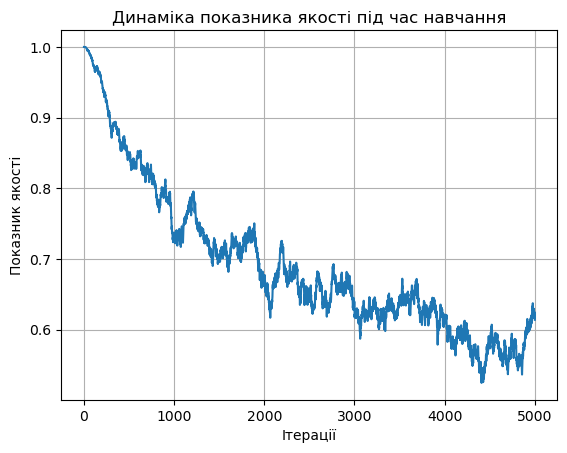

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0  # Коефіцієнт L1-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Дані
x_train_5 = np.array([[42, 6], [39, 18], [25, 16], [27, 13], [24, 33], [8, 44], [30, 17], [7, 48], [25, 17]])
x_train_5 = np.hstack((x_train_5, np.ones((len(x_train_5), 1))))  # Додаємо стовпець константи
y_train_5 = np.array([1, 1, -1, -1, -1, -1, 1, -1, -1])

fn = len(x_train_5[0])
n_train = len(x_train_5)  # Розмір навчальної вибірки
w = np.zeros(fn)           # Початкові вагові коефіцієнти
nt = 0.00001               # Крок збіжності SGD
lm = 0.01                  # Швидкість "забування" для Q
N = 5000                   # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_5, y_train_5)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train_5[k], y_train_5[k])    # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train_5[k], y_train_5[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_5, y_train_5)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()

<ol>
    <b>4.Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. 
</ol>

Вагові коефіцієнти: [ 0.07630913 -0.10446031 -0.00147976]
Показник якості: 0.5890170812585495


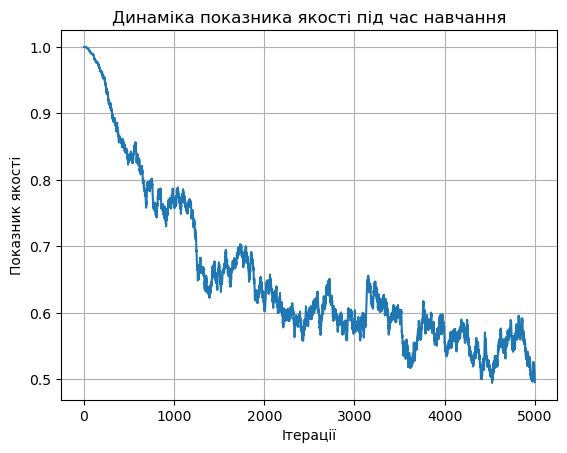

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L2 = 0.01  # Коефіцієнт L2-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + 2 * L2 * w

# Дані
x_train_5 = np.array([[42, 6], [39, 18], [25, 16], [27, 13], [24, 33], [8, 44], [30, 17], [7, 48], [25, 17]])
x_train_5 = np.hstack((x_train_5, np.ones((len(x_train_5), 1))))  # Додаємо стовпець константи
y_train_5 = np.array([1, 1, -1, -1, -1, -1, 1, -1, -1])

fn = len(x_train_5[0])
n_train = len(x_train_5)  # Розмір навчальної вибірки
w = np.zeros(fn)           # Початкові вагові коефіцієнти
nt = 0.00001               # Крок збіжності SGD
lm = 0.01                  # Швидкість "забування" для Q
N = 5000                   # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_5, y_train_5)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train_5[k], y_train_5[k])    # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train_5[k], y_train_5[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_5, y_train_5)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()

<h1 align="center">Контрольні запитання</h1>

1.Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?
<br><br>
   <b>
 L2-регуляризатор: <br>
L2-регуляризатор, також відомий як "регуляризація Тіхонова" або "регуляризація рідкогоштрафного опису", це метод регуляризації, що використовується в задачах машинного навчання для уникнення перенавчання (overfitting) і контролю за складністю моделі. В регресії L2-регуляризатор додає суму квадратів значень вагових коефіцієнтів до функції втрат, а в класифікації - до штрафу за помилкові класифікації.
</b>
<br><br>
2.Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?
  <br><br>
   <b>
   Відмінність між L1 та L2 регуляризаторами:<br>
Основна відмінність між L1 і L2 регуляризаторами полягає в тому, як вони штрафують величину коефіцієнтів моделі. L1-регуляризатор додає суму абсолютних значень коефіцієнтів, тоді як L2-регуляризатор додає суму квадратів коефіцієнтів. Це призводить до інших властивостей моделі: L1 може призводити до розріджених векторів ваги, тоді як L2 зазвичай породжує рівномірніші ваги з меншою амплітудою.
  </b>
   <br><br>
3.Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?
<br><br>
<b> 
Простий бінарний лінійний класифікатор зі стохастичним градієнтним спуском:
<br>
Простий лінійний бінарний класифікатор може бути реалізований за допомогою стохастичного градієнтного спуску використовуючи логістичну (сигмоїдальну) функцію втрату.
</b>
<br><br>
4.Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?
<br><br>
   <b>
  Стохастичний градієнтний спуск:
<br>
Стохастичний градієнтний спуск (SGD) - це метод оптимізації, що використовується для навчання моделей машинного навчання, особливо там, де набір даних дуже великий. Він використовує випадковий підвибірку даних для оцінки градієнта функції втрат. Стратегія спрощує обчислення градієнта та дозволяє збільшити швидкість навчання.
  </b>
   <br><br>
5.Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?
  <br><br>
<b>
Вплив регуляризаторів на навчання моделі:
<br>
Використання регуляризаторів (L1, L2) впливає на навчання моделі шляхом контролю за перенавчанням і створенням більш загальних моделей. Вони допомагають уникнути перенавчання, зменшуючи амплітуду коефіцієнтів моделі, що дозволяє покращити її загальні характеристики та здатність узагальнення до нових даних. Крім того, вони також можуть допомагати управляти ефектом розрідженості в даних та покращувати усталеність та швидкість збіжності алгоритмів оптимізації.
</b>